In [ ]:
import pandas as pd
import numpy as np

playfile=pd.read_csv("googleplaystore.csv") 
print(playfile.head())

   Rating                                                App        Category  \
0     4.1     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN   
1     3.9                                Coloring book moana  ART_AND_DESIGN   
2     4.7  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN   
3     4.5                              Sketch - Draw & Paint  ART_AND_DESIGN   
4     4.3              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN   

   Reviews  Size     Installs  Type Price Content Rating  \
0      159   19M      10,000+  Free     0       Everyone   
1      967   14M     500,000+  Free     0       Everyone   
2    87510  8.7M   5,000,000+  Free     0       Everyone   
3   215644   25M  50,000,000+  Free     0           Teen   
4      967  2.8M     100,000+  Free     0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  
0               Art & Design     7-Jan-18               1.0.0  4.0.3 and up  
1 

In [ ]:
playfile.isnull().sum()

Rating            0
App               0
Category          0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       0
dtype: int64

In [ ]:
rat_clean=playfile['Rating'].mean()
playfile['Rating'].fillna(rat_clean,inplace=True)
print(playfile[10:30]) 

      Rating                                              App        Category  \
10  4.400000                          Text on Photo - Fonteee  ART_AND_DESIGN   
11  4.400000          Name Art Photo Editor - Focus n Filters  ART_AND_DESIGN   
12  4.200000                   Tattoo Name On My Photo Editor  ART_AND_DESIGN   
13  4.600000                            Mandala Coloring Book  ART_AND_DESIGN   
14  4.400000  3D Color Pixel by Number - Sandbox Art Coloring  ART_AND_DESIGN   
15  3.200000                  Learn To Draw Kawaii Characters  ART_AND_DESIGN   
16  4.700000     Photo Designer - Write your name with shapes  ART_AND_DESIGN   
17  4.500000                         350 Diy Room Decor Ideas  ART_AND_DESIGN   
18  4.300000                    FlipaClip - Cartoon animation  ART_AND_DESIGN   
19  4.600000                                     ibis Paint X  ART_AND_DESIGN   
20  4.000000                      Logo Maker - Small Business  ART_AND_DESIGN   
21  4.100000        Boys Pho

C:\Users\hp\AppData\Local\Temp\ipykernel_20312\1774928807.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(rat_clean,inplace=True)


In [ ]:
playfile["Type"].fillna("free",inplace=True)
playfile.isnull().sum()

Rating            0
App               0
Category          0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       0
dtype: int64

In [ ]:
playfile["Current Ver"].isnull().sum()
ver_clean=playfile["Current Ver"].mode()[0]
playfile["Current Ver"].fillna(ver_clean,inplace=True)

In [ ]:
playfile.isnull().sum()

Rating            0
App               0
Category          0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
playfile.to_excel("Cleaned_data.xlsx",index=False)
print("file saved")

file saved


In [28]:
playfile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rating          10840 non-null  float64
 1   App             10839 non-null  object 
 2   Category        10840 non-null  object 
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

playfile=pd.read_excel("Cleaned_data.xlsx")

#top 10 apps in the playstore
top_apps=playfile.groupby("App")["Installs"].max().sort_values(ascending=False).head(10)
print(top_apps)

App
Pou                                            500,000,000+
Microsoft Word                                 500,000,000+
Twitter                                        500,000,000+
Gboard - the Google Keyboard                   500,000,000+
Dropbox                                        500,000,000+
UC Browser - Fast Download Private & Secure    500,000,000+
Facebook Lite                                  500,000,000+
SHAREit - Transfer & Share                     500,000,000+
Google Duo - High Quality Video Calls          500,000,000+
Snapchat                                       500,000,000+
Name: Installs, dtype: object


Type
Free    10039
Paid      800
free        1
Name: count, dtype: int64


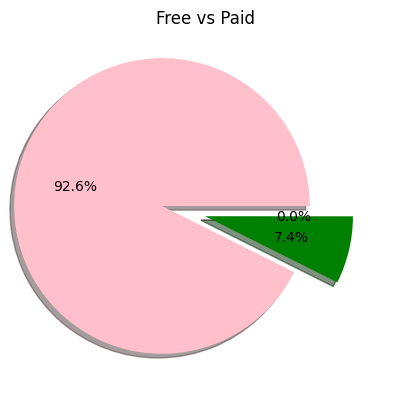

The free apps are the highest in playstore


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Free vs paid size
playfile=pd.read_excel("Cleaned_data.xlsx")
type_counts=playfile["Type"].value_counts()
print(type_counts)

myexplode=[0.3,0,0]

plt.title("Free vs Paid")
plt.pie(type_counts,colors=['pink','green'],explode=myexplode,shadow=True,autopct="%1.1f%%")
plt.show()

print("The free apps are the highest in playstore")

In [13]:
playfile['Category'].value_counts()

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
Name: count, dtype: int64

In [14]:
#best rated app in each category
import pandas as pd


playfile_clean = playfile.dropna(subset=['Rating', 'Category', 'App'])

top_categories = playfile_clean['Category'].value_counts().head(10).index
playfile_top_cats = playfile_clean[playfile_clean['Category'].isin(top_categories)]

best_apps = playfile_top_cats.sort_values(['Category', 'Rating'], ascending=[True, False]) .groupby('Category').first().reset_index()

print(best_apps[['Category', 'App', 'Rating']])


          Category                                               App  Rating
0         BUSINESS                             Ag Valley Cooperative     5.0
1    COMMUNICATION                                         BS-Mobile     5.0
2           FAMILY                             Hey AJ! It's Bedtime!     5.0
3             GAME                                  Axe Champs! Wars     5.0
4        LIFESTYLE  Tafsiir Quraan MP3 Af Soomaali Quraanka Kariimka     5.0
5          MEDICAL          Super Hearing Secret Voices Recorder PRO     5.0
6  PERSONALIZATION                                   P-Home for KLWP     5.0
7     PRODUCTIVITY                                    BV Mobile Apps     5.0
8           SPORTS                                         CricQuick     5.0
9            TOOLS                                      ADS-B Driver     5.0


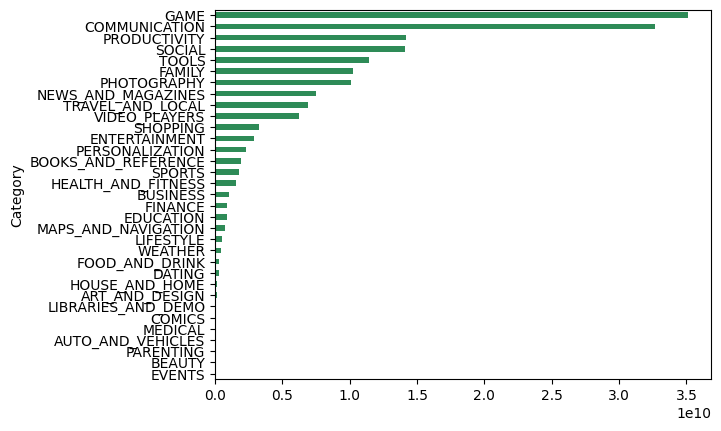

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

#top installs by category visualization
top_installs=playfile.groupby('Category')['Installs'].sum().sort_values(ascending=False)

top_installs.plot(kind='barh',color='seagreen')
plt.gca().invert_yaxis()
plt.show()

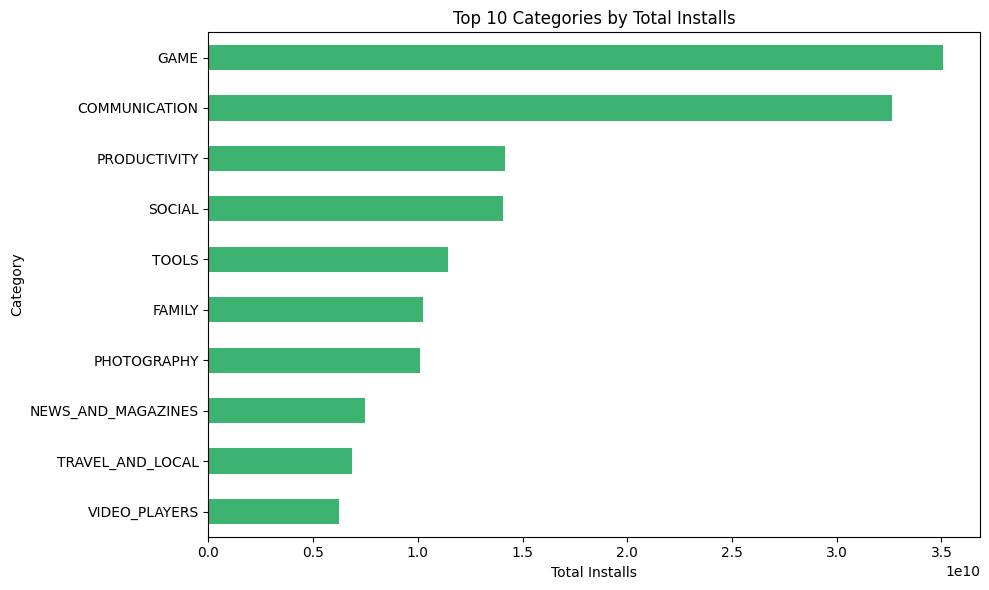

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

playfile['Installs'] = playfile['Installs'].astype(str).str.replace('[+,]', '', regex=True).astype(int)
total_installs = playfile.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
total_installs.plot(kind='barh', color='mediumseagreen')
plt.xlabel('Total Installs')
plt.title('Top 10 Categories by Total Installs')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()
